In [ ]:
# Install required libraries
!pip install alibi-detect pandas pyarrow pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
  Attempting uninstall: scikit-image
    Found existing inst

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from alibi_detect.cd import TabularDrift
from pyngrok import ngrok

## Detecting Data Drift Between Training and Production Datasets

This code snippet detects **data drift** between the training dataset and the production dataset, which is essential for monitoring model performance over time. **Data drift** refers to changes in the statistical properties of the input data, which may affect the model's predictions. By detecting drift, we can ensure that the model is still valid and accurate in a production environment.

### Code Overview

1. **Load Datasets**:
   - The training and production datasets are loaded from GitHub using the `pd.read_parquet()` function.
   - The datasets are loaded from a remote GitHub repository using the following base URL:
     ```python
     github_base_url = "https://raw.github.com/Guardian99/ISB-CT1_GR03/main/datasets/"
     ```

2. **Align Columns**:
   - The code ensures that both the training and production datasets have the same set of features by using the intersection of their columns (`common_cols`).

3. **Convert Data to NumPy Arrays**:
   - The data is converted into NumPy arrays (`train_data_np` and `prod_data_np`) for compatibility with the drift detection algorithm.

4. **Initialize Drift Detector**:
   - The `TabularDrift` detector is initialized with the training data (`train_data_np`) and a significance level (`p_val=0.05`), which defines the threshold for detecting drift.

5. **Detect Drift**:
   - The `drift_detector.predict()` method is called to compare the production data (`prod_data_np`) with the reference training data, detecting any significant drift in the feature distributions.

6. **Summarize Results**:
   - A DataFrame (`results_df`) is created to summarize the p-values, thresholds, and whether drift was detected for each feature.
   - Features with a p-value less than 0.05 are considered to have drifted.
   - The overall drift status is determined based on the presence of drift in any feature.

### Code Execution Flow

1. **Data Preparation**:
   - Training and production data are loaded from the GitHub repository and aligned to ensure they share the same columns.
   
2. **Drift Detection**:
   - The `TabularDrift` object is used to detect drift, comparing the distributions of features between the training and production datasets.
   
3. **Drift Evaluation**:
   - For each feature, a p-value is calculated. If the p-value is less than 0.05, drift is detected for that feature. The threshold for drift is also recorded.
   
4. **Display Results**:
   - The results are displayed in a DataFrame that shows which features have experienced drift and their respective p-values. Additionally, an overall drift status is printed based on whether any feature has drifted.

### Key Points
- **Data Drift Detection**: This method detects drift by comparing the statistical properties of training data with production data.
- **P-Value**: A p-value less than 0.05 indicates significant drift in a feature.
- **Feature-by-Feature Analysis**: Each feature's drift status is evaluated individually, allowing for targeted interventions.
- **Overall Drift Status**: An overall status is provided to indicate if any drift is present in the dataset.



In [ ]:
# Define GitHub base URL for datasets
github_base_url = "https://raw.github.com/Guardian99/ISB-CT1_GR03/main/datasets/"

# Load train and production datasets from GitHub
train_data = pd.read_parquet(f"{github_base_url}train.parquet")
prod_data = pd.read_parquet(f"{github_base_url}prod.parquet")

# Align columns between train and production data
common_cols = train_data.columns.intersection(prod_data.columns)
train_data = train_data[common_cols]
prod_data = prod_data[common_cols]

# Convert data to numpy arrays for drift detection
train_data_np = train_data.values
prod_data_np = prod_data.values

# Initialize the Tabular Drift Detector
# p_val=0.05 is the significance level for detecting drift
drift_detector = TabularDrift(x_ref=train_data_np, p_val=0.05)

# Detect drift in production data
drift_results = drift_detector.predict(prod_data_np)

# Extract drift detection results
feature_drift = drift_results["data"]["is_drift"]  # Overall drift status
p_values = drift_results["data"]["p_val"]          # P-values for each feature
thresholds = drift_results["data"]["threshold"]    # Thresholds for each feature

# Create a DataFrame to summarize results
results_df = pd.DataFrame({
    "Feature": train_data.columns,
    "P-Value": p_values,
    "Threshold": thresholds,
    "Drift Detected": ["Yes" if p < 0.05 else "No" for p in p_values]
})

# Determine overall drift status
overall_drift_status = "Yes" if feature_drift else "No"
print(f"Overall Drift Detected: {overall_drift_status}")

# Display drift detection results
print(results_df)

Overall Drift Detected: No
                     Feature   P-Value  Threshold Drift Detected
0                  Education  0.998159   0.005556             No
1                JoiningYear  0.170186   0.005556             No
2                       City  0.992152   0.005556             No
3                PaymentTier  1.000000   0.005556             No
4                        Age  0.255043   0.005556             No
5                     Gender  0.775182   0.005556             No
6                EverBenched  0.999620   0.005556             No
7  ExperienceInCurrentDomain  1.000000   0.005556             No
8                 LeaveOrNot  1.000000   0.005556             No


/usr/local/lib/python3.10/dist-packages/alibi_detect/cd/tabular.py:113: UserWarning: No `categories_per_feature` dict provided so all features are assumed to be numerical. `KSDrift` will be applied to all features.
  warnings.warn('No `categories_per_feature` dict provided so all features are assumed to be numerical. '


In [ ]:
# Print the results dataframe in a grid format
print(tabulate(results_df, headers="keys", tablefmt="grid"))

+----+---------------------------+-----------+-------------+------------------+
|    | Feature                   |   P-Value |   Threshold | Drift Detected   |
+====+===========================+===========+=============+==================+
|  0 | Education                 |  0.998159 |  0.00555556 | No               |
+----+---------------------------+-----------+-------------+------------------+
|  1 | JoiningYear               |  0.170186 |  0.00555556 | No               |
+----+---------------------------+-----------+-------------+------------------+
|  2 | City                      |  0.992152 |  0.00555556 | No               |
+----+---------------------------+-----------+-------------+------------------+
|  3 | PaymentTier               |  1        |  0.00555556 | No               |
+----+---------------------------+-----------+-------------+------------------+
|  4 | Age                       |  0.255043 |  0.00555556 | No               |
+----+---------------------------+------

## Visualizing Feature Distributions: Training vs. Production Data

In this section, we visualize the distributions of features in both the training and production datasets. By comparing these distributions, we can detect potential **data drift** and gain insights into how the data has changed over time.

### Code Overview

1. **Separate Numeric and Categorical Columns**:
   - The features are divided into numeric and categorical columns using `select_dtypes()`:
     ```python
     numeric_cols = train_data.select_dtypes(include=["number"]).columns
     categorical_cols = train_data.select_dtypes(exclude=["number"]).columns
     ```

2. **KDE Plots for Numeric Features**:
   - For each numeric column, a **Kernel Density Estimate (KDE)** plot is generated to visualize the probability density function of the feature's distribution in both the **training** and **production** datasets.
   - The **blue** curve represents the training data distribution, and the **orange** curve represents the production data distribution.

3. **Bar Charts for Categorical Features**:
   - For categorical features, **bar plots** are generated to visualize the frequency of each category in both datasets.
   - The categories are normalized, i.e., the relative frequencies (percentages) are plotted rather than absolute counts:
     ```python
     train_counts = train_data[col].value_counts(normalize=True)
     sns.barplot(x=train_counts.index, y=train_counts.values, alpha=0.6, label="Train", color="blue")
     prod_counts = prod_data[col].value_counts(normalize=True)
     sns.barplot(x=prod_counts.index, y=prod_counts.values, alpha=0.6, label="Production", color="orange")
     ```

4. **Displaying Results**:
   - Each plot provides a title indicating the feature being visualized and includes a legend to differentiate the distributions of the training and production datasets.

### Code Execution Flow

1. **Data Preparation**:
   - The data is divided into numeric and categorical columns, allowing for tailored visualization methods.
   
2. **Visualization**:
   - **KDE plots** are created for numeric features, highlighting the shape of the distribution in both datasets.
   - **Bar plots** are generated for categorical features, showing the proportion of each category in both datasets.

3. **Result Interpretation**:
   - The plots allow us to visually inspect whether the distribution of features has changed significantly between the training and production data. Significant changes could indicate **data drift** or changes in the underlying data distribution.

### Key Points
- **KDE Plots**: Ideal for visualizing continuous variables and detecting differences in distribution shapes between datasets.
- **Bar Charts**: Useful for categorical data to compare the frequency of different categories in training and production data.
- **Visual Drift Detection**: Visual comparison of feature distributions is an effective way to detect potential drift in the data over time.




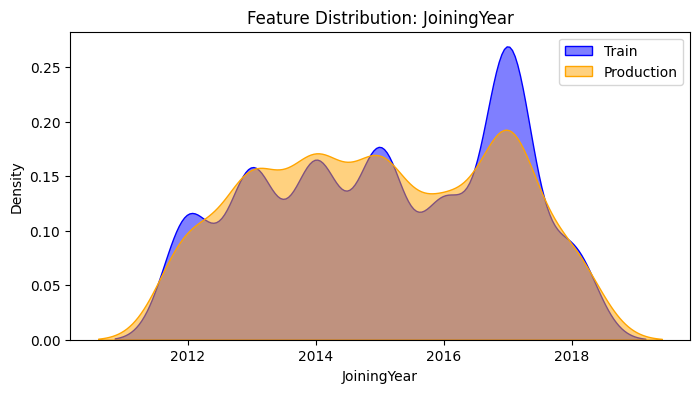

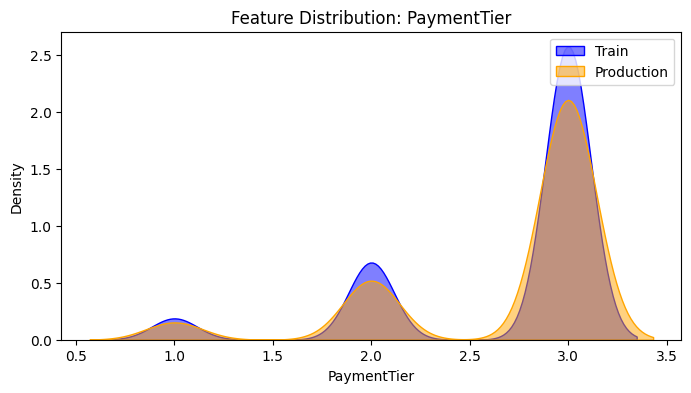

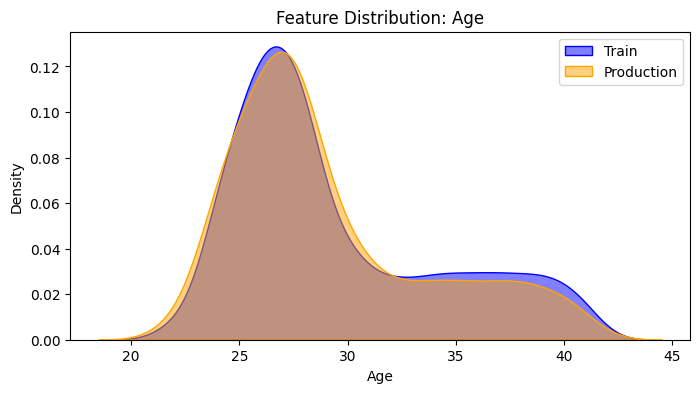

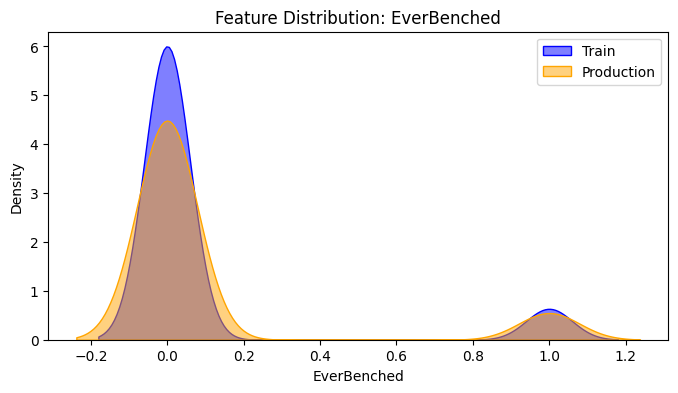

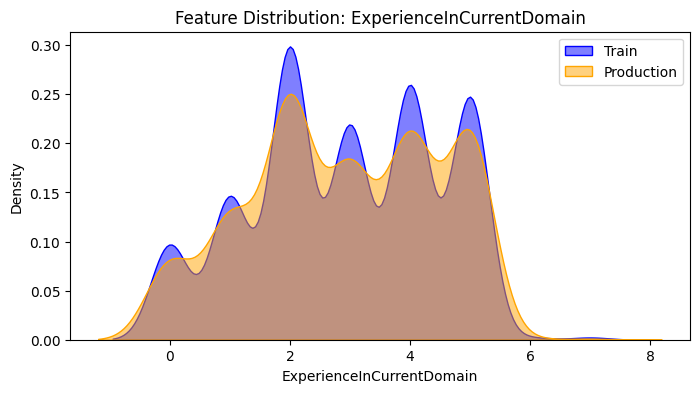

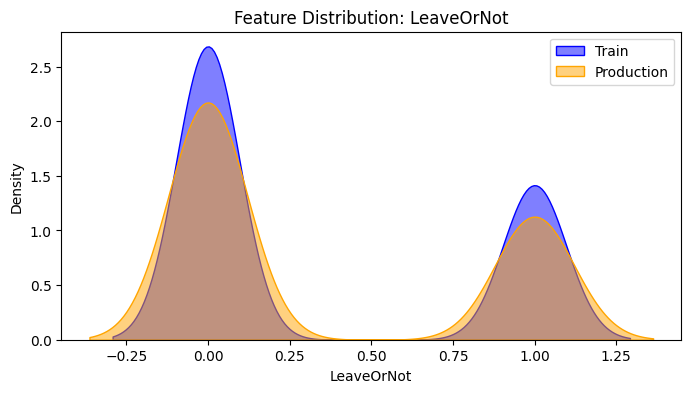

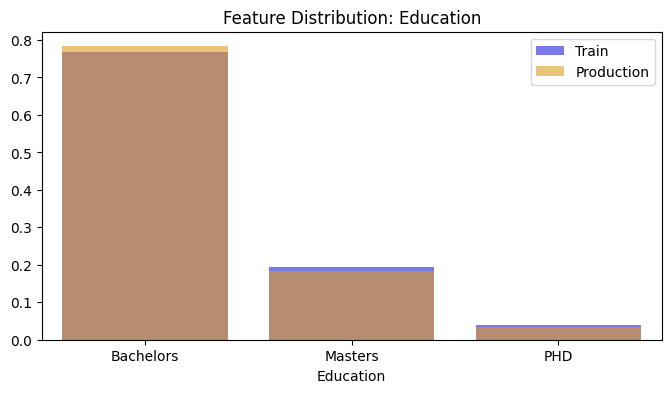

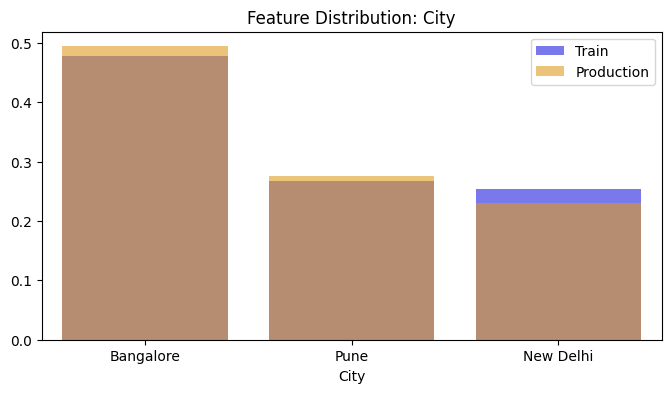

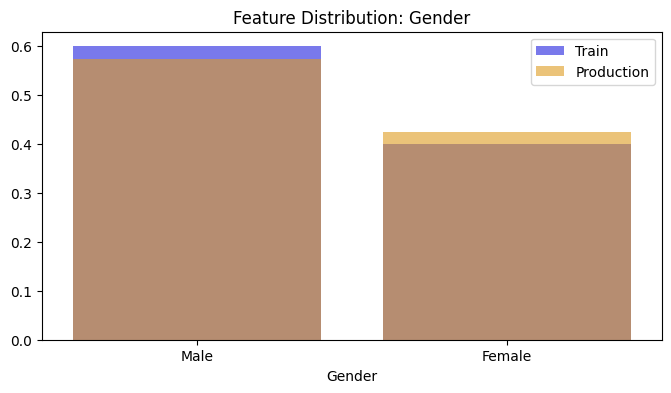

In [ ]:
# Visualize distributions for each feature in train and production datasets
# Separate numeric and categorical columns
numeric_cols = train_data.select_dtypes(include=["number"]).columns
categorical_cols = train_data.select_dtypes(exclude=["number"]).columns

# Plot KDE for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))

    # KDE plot for train data
    sns.kdeplot(
        train_data[col], label="Train", fill=True, alpha=0.5, color="blue"
    )

    # KDE plot for production data
    sns.kdeplot(
        prod_data[col], label="Production", fill=True, alpha=0.5, color="orange"
    )

    # Set title and legend
    plt.title(f"Feature Distribution: {col}")
    plt.legend()
    plt.show()

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))

    # Bar plot for train data
    train_counts = train_data[col].value_counts(normalize=True)
    sns.barplot(x=train_counts.index, y=train_counts.values, alpha=0.6, label="Train", color="blue")

    # Bar plot for production data
    prod_counts = prod_data[col].value_counts(normalize=True)
    sns.barplot(x=prod_counts.index, y=prod_counts.values, alpha=0.6, label="Production", color="orange")

    # Set title and legend
    plt.title(f"Feature Distribution: {col}")
    plt.legend()
    plt.show()